    # Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

[-0.83221835 -0.04467742 -0.7754471  ... -0.1828089   0.53798175
 -0.78085136]


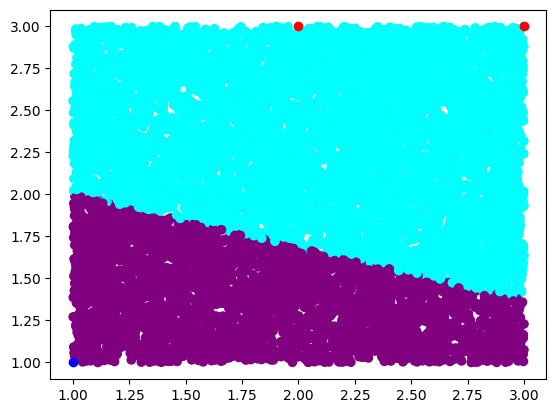

<Figure size 640x480 with 0 Axes>

In [6]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      1,
      -1,
      -1
],dtype=ctypes.c_float)

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)
number_of_layers = len(layers_pmc)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))

X_flat = X.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.1, # learning rate
      100, # epochs
      True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr,(3,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000) :
    x_1 = random.random()*2 + 1
    x_2 = random.random()*2 + 1
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr,(1*len(X_to_predict),))
print(pmc_predict_model)

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)

plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [8]:
my_lib.delete_float_array(pmc_trained_model_ptr, 3)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

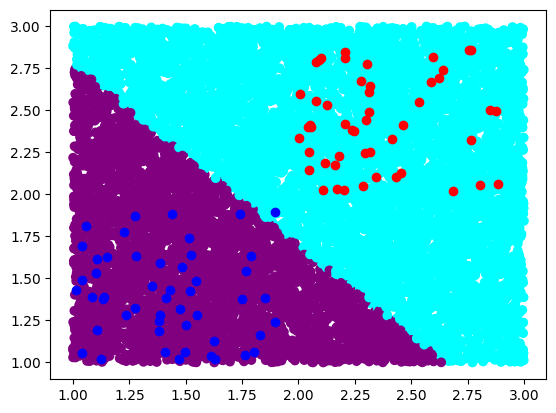

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)
number_of_layers = len(layers_pmc)

X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0],dtype=ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3,)))

X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.1, # learning rate
      100, # epochs
      True,
)
pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0, 3.0)
    x_2 = random.uniform(1.0, 3.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y < 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

In [11]:
my_lib.delete_float_array(pmc_trained_model_ptr, 3)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

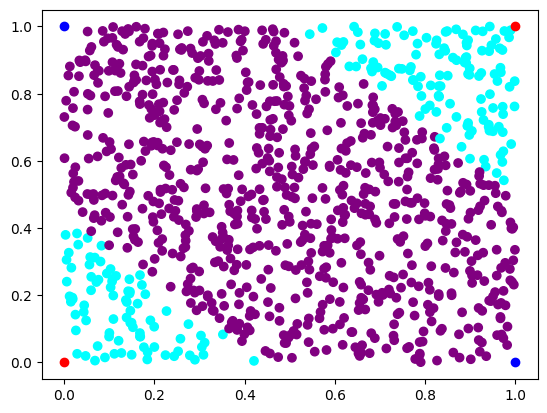

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 2, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)
number_of_layers = len(layers_pmc)

X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]],dtype=ctypes.c_float)
Y = np.array([1, 1, -1, -1],dtype=ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))

X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.5, # learning rate
      10000, # epochs
      True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(0.0, 1.0)
    x_2 = random.uniform(0.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    True, # is classification
)
pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y <= 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [14]:
my_lib.delete_float_array(pmc_trained_model_ptr, 9)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

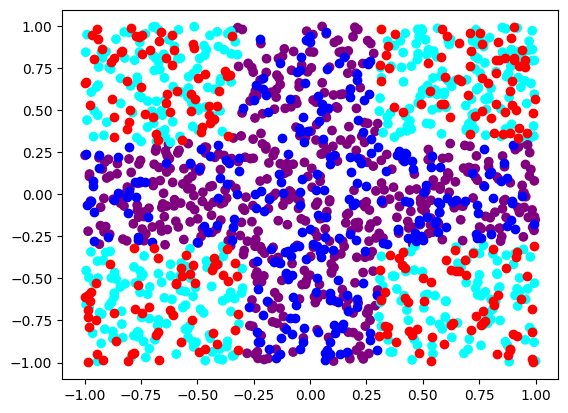

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 4, 1], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

X = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((17,)))

X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)


pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      1, # number of classes to predict
      0.05, # learning rate
      10000, # epochs
      True,
)
pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (17,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    1, # number of classes to predict
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (1 * len(X_to_predict),))

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in pmc_predict_model :
    if y <= 0 :
        predicted_labels.append('cyan')
    else :
        predicted_labels.append('purple')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

In [17]:
my_lib.delete_float_array(pmc_trained_model_ptr, 17)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 1*len(X_to_predict))
del pmc_predict_ptr

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

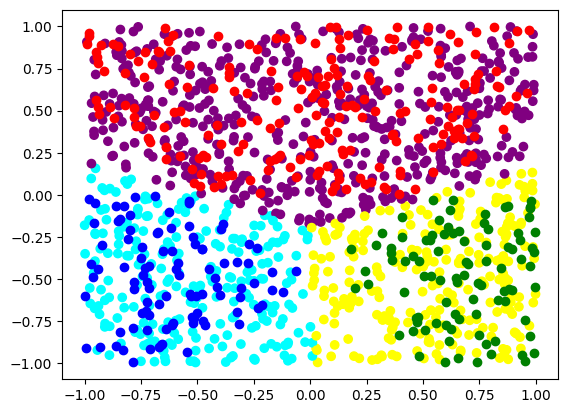

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([2, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)
number_of_layers = len(layers_pmc)

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

X=np.array(X,dtype=ctypes.c_float)
Y=np.array(Y,dtype=ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((9,)))

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      3, # number of classes to predict
      0.05, # learning rate
      500, # epochs
      True,
)
pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (9,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    3, # number of classes to predict
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(X_to_predict),))

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        predicted_labels.append('cyan')
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2]:
        predicted_labels.append('purple')
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [19]:
my_lib.delete_float_array(pmc_trained_model_ptr, 9)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 3*len(X_to_predict))
del pmc_predict_ptr

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

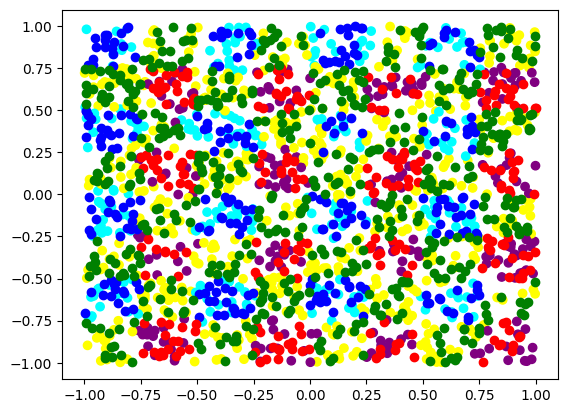

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
my_lib.delete_float_array.restype = None
my_lib.generate_multi_layer_perceptron_model.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)



layers = np.array([2, 16, 16, 16, 16, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

number_of_layers = len(layers_pmc)

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

x = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

w_array_ptr = my_lib.generate_multi_layer_perceptron_model(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((3*16 + 17*16 + 17*16 +17*16+ 17*3,)))

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

my_lib.train_multi_layer_perceptron_model_old.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.train_multi_layer_perceptron_model_old.restype = ctypes.POINTER(ctypes.c_float)

pmc_trained_model_ptr = my_lib.train_multi_layer_perceptron_model_old(
      w_array_ptr,
      layers_ptr_pmc,
      number_of_layers,
      x_to_predict_ptr,
      len(X), # number of inputs
      len(X[0]), # dimension of inputs
      y_to_predict_ptr,
      3, # number of classes to predict
      0.001, # learning rate
      10000, # epochs
      True,
)
pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (3*16 + 17*16 + 17*16 +17*16+ 17*3,))

my_lib.predict_with_multi_layer_perceptron_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.predict_with_multi_layer_perceptron_model.restype = ctypes.POINTER(ctypes.c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(-1.0, 1.0)
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.predict_with_multi_layer_perceptron_model(
    pmc_trained_model_ptr, # pointeur vers le modele entrainé
    layers_ptr_pmc, # pointeur vers la forme de pmc
    number_of_layers, # number of layers
    x_to_predict_ptr_mlp, # pointeur vers le dataset à prédire
    len(X_to_predict), # nombre d'éléments du dataset
    len(X_to_predict[0]), # dimension des éléments du dataset
    3, # number of classes to predict
    True, # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(X_to_predict),))

predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        predicted_labels.append('cyan')
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2] :
        predicted_labels.append('purple')
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [23]:
my_lib.delete_float_array(pmc_trained_model_ptr, 3*16 + 17*16 + 17*16 +17*16+ 17*3)
del pmc_trained_model_ptr
my_lib.delete_float_array(pmc_predict_ptr, 3*len(X_to_predict))
del pmc_predict_ptr